In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

In [23]:
# reads the data set from the file
data = pd.read_csv("SouthGermanCredit.csv")

In [24]:
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

In [26]:
data.shape

(1000, 21)

In [27]:
data.nunique()

status                       4
duration                    33
credit_history               5
purpose                     10
amount                     923
savings                      5
employment_duration          5
installment_rate             4
personal_status_sex          4
other_debtors                3
present_residence            4
property                     4
age                         53
other_installment_plans      3
housing                      3
number_credits               4
job                          4
people_liable                2
telephone                    2
foreign_worker               2
credit_risk                  2
dtype: int64

# CHECKING FOR MISSING OR NULL VALUES 

In [28]:
#checking if NaN values exist
# checking if empty values exist
data.isnull().sum()
data.eq(" ").sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [29]:
data.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

In [30]:
(data['duration']<0).sum()

0

In [31]:
(data['age']<0).sum()

0

In [32]:
(data['employment_duration']<0).sum()

0

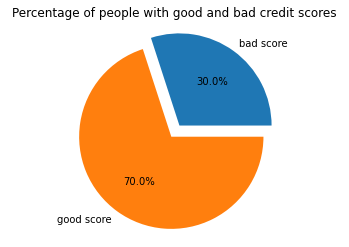

In [33]:
#pie chart for credit score
bad_score = (data["credit_risk"]==0).sum()
good_score = (data["credit_risk"]==1).sum()
credit_score_data = [bad_score, good_score]
credit_score_labels = ["bad score","good score"]
plt.pie(credit_score_data, labels=credit_score_labels, explode=(0,0.15), autopct='%1.1f%%')
plt.title('Percentage of people with good and bad credit scores')
plt.axis('equal')
plt.show()

# Relationship with target variable

<AxesSubplot:xlabel='credit_risk', ylabel='count'>

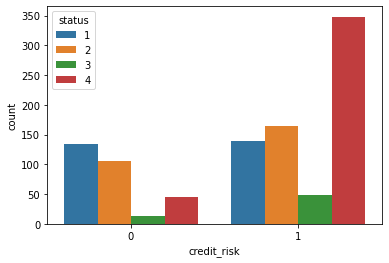

In [34]:
# status vs credit_risk
sns.countplot(x="credit_risk",hue="status", data=data)

credit score is good for people with status=4 

<AxesSubplot:xlabel='credit_risk', ylabel='count'>

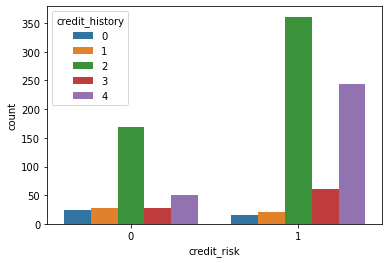

In [35]:
sns.countplot(x="credit_risk",hue="credit_history", data=data)

Credit score depends on credit history its is good for people with no dues and bad for people with dues

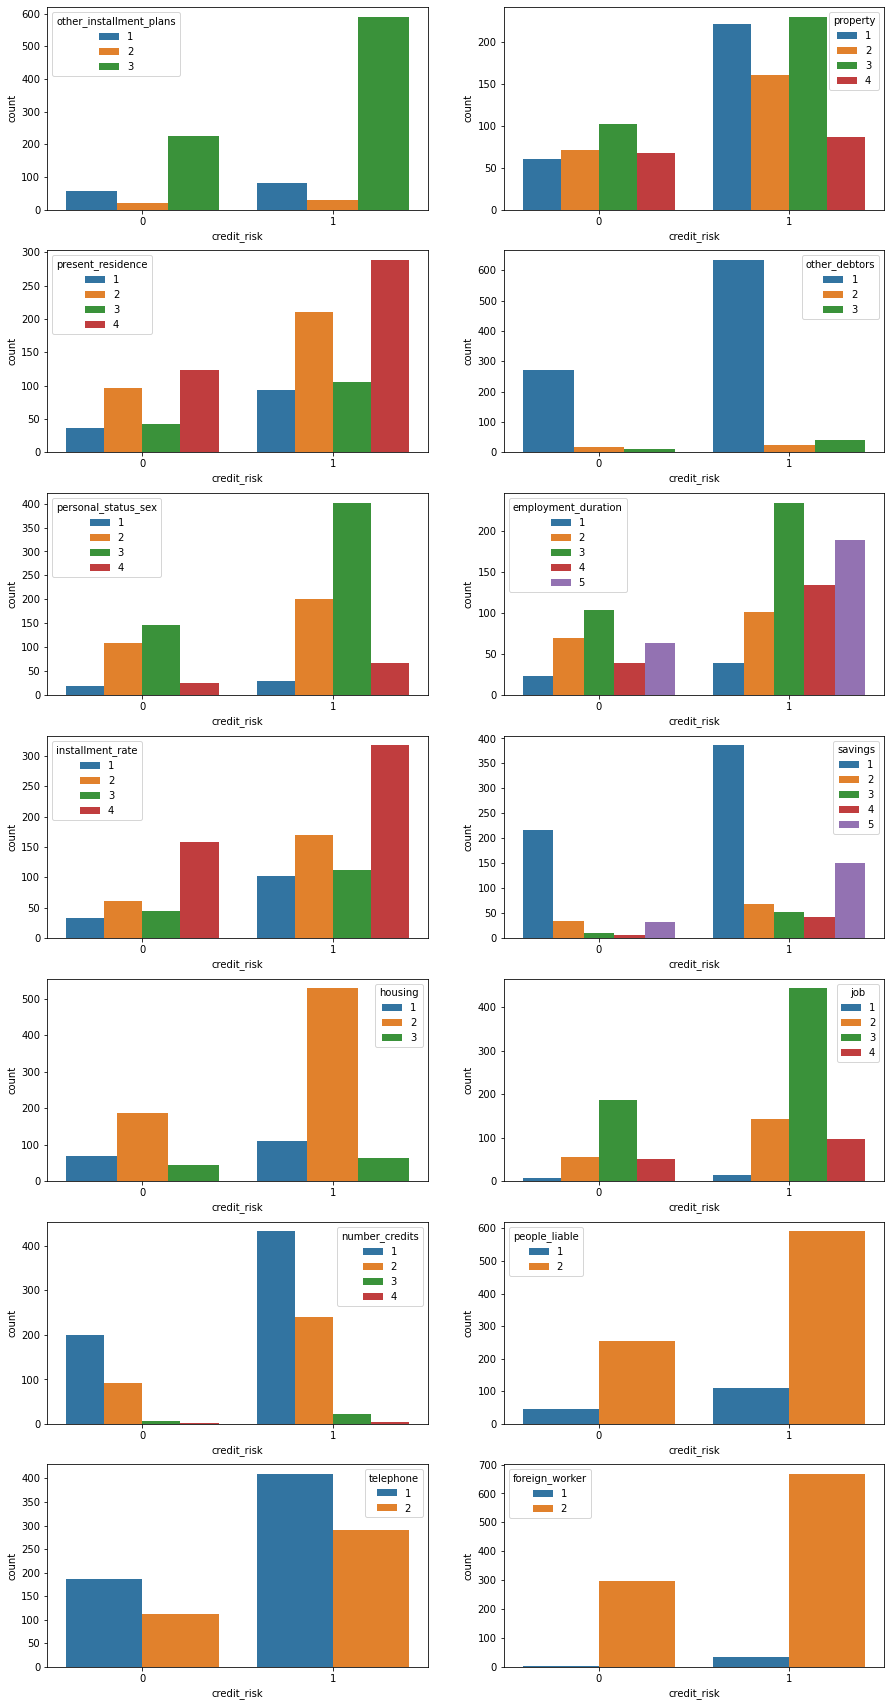

In [36]:
df = data[['other_installment_plans','property','present_residence','other_debtors',
           'personal_status_sex','employment_duration','installment_rate','savings',
           'housing','job','number_credits','people_liable','telephone','foreign_worker']].copy()

count=1
plt.subplots(figsize=(15, 35))
plt.title("plots")
for i in df.columns:
    plt.subplot(8,2,count)
    sns.countplot(x="credit_risk", hue=df[i], data=data)
    count+=1

plt.show()

###### Observations:
status - credit score is good in cases where status score is 4 i.e.indvidual has >= 200 DM/salary for at least 1 year
savings - credit score is good in cases where savings is unknown/no savings account
foreingn worker - credit score is 1 when individual are not foreign workers
present residence - credit score is good when individual's present residence stay period is high i.e.>=7 years
credit history - credit score is good when individual has no creits taken or all credits paid back duly
employment_duration - credit score is good when individual is employed for more than 1 year and less than 4 years

<AxesSubplot:xlabel='credit_risk', ylabel='age'>

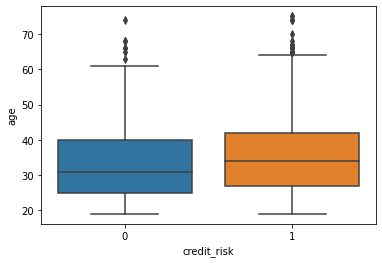

In [37]:
sns.boxplot(x="credit_risk", y="age", data=data)

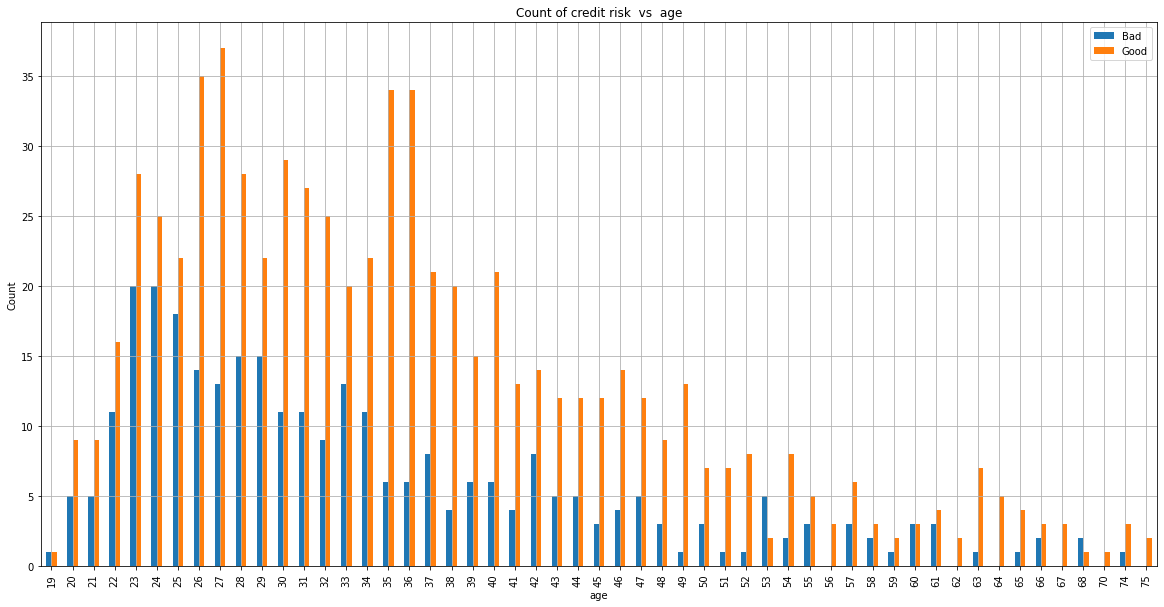

In [38]:
x=data.groupby(["age","credit_risk"]).count()
x['status'].unstack().plot(kind="bar",stacked=False,figsize=(20,10),grid=True);
plt.title("Count of credit risk  vs  age") #change title for the plot
plt.legend(["Bad", "Good"]); 
plt.ylabel("Count");

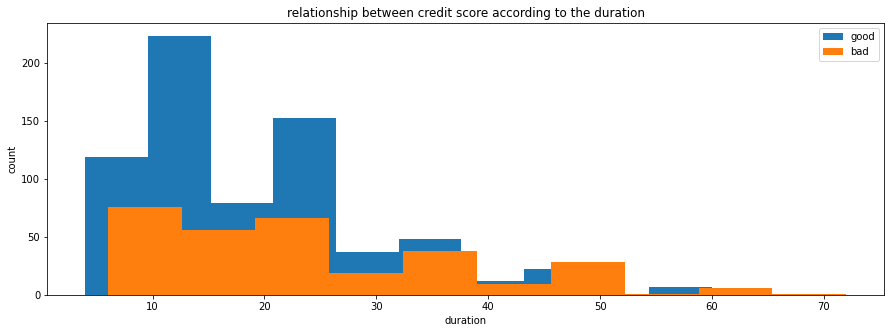

In [39]:
df=data.copy()
good= df['credit_risk'] == 1
bad= df['credit_risk'] == 0


df.duration[good].plot(kind= 'hist', label= 'good',figsize=(15,5));
df.duration[bad].plot(kind= 'hist', label= 'bad',figsize=(15,5));
plt.legend()
plt.ylabel('count');
plt.xlabel('duration');
plt.title('relationship between credit score according to the duration');

In [40]:
print("max age=",data['age'].max())
print("min age=",data['age'].min())


max age= 75
min age= 19


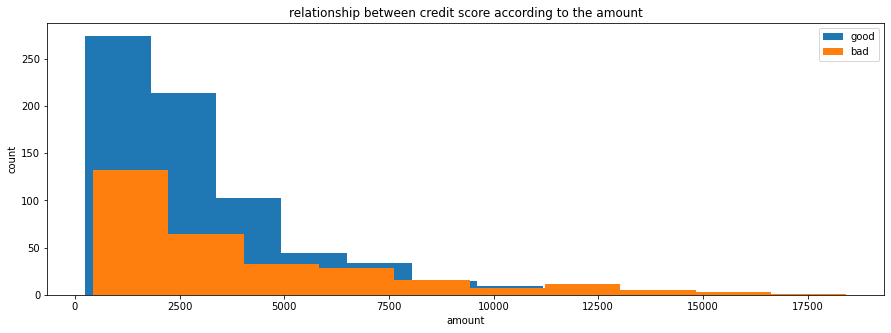

In [41]:
df=data.copy()
good= df['credit_risk'] == 1
bad= df['credit_risk'] == 0


df.amount[good].plot(kind= 'hist', label= 'good',figsize=(15,5));
df.amount[bad].plot(kind= 'hist', label= 'bad',figsize=(15,5));
plt.legend()
plt.ylabel('count');
plt.xlabel('amount');
plt.title('relationship between credit score according to the amount');

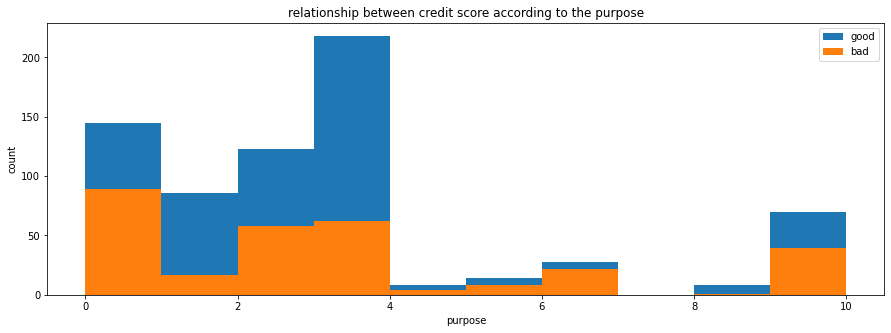

In [42]:
df=data.copy()
good= df['credit_risk'] == 1
bad= df['credit_risk'] == 0


df.purpose[good].plot(kind= 'hist', label= 'good',figsize=(15,5));
df.purpose[bad].plot(kind= 'hist', label= 'bad',figsize=(15,5));
plt.legend()
plt.ylabel('count');
plt.xlabel('purpose');
plt.title('relationship between credit score according to the purpose');

###### Observations
Amount - credit score is good in cases where amount is less i.e. less than 3.66K
Duration - credit score is good in cases where duration is less and as duration increases credit score becomes 0
purpose - credit score is good in cases where purpose score is 0 to 4 i.e. when purpose is car,furniture/equipment radio/television

# CREDIT QUESTION

<AxesSubplot:xlabel='personal_status_sex', ylabel='count'>

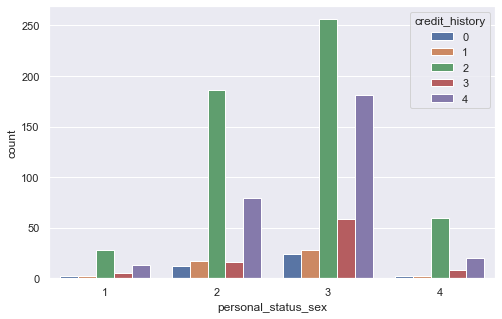

In [43]:
sns.set(rc = {'figure.figsize':(8,5)})
sns.countplot(x="personal_status_sex",hue="credit_history", data=data)

# CORRELATION MATRIX

In [44]:

corealtion_matrix = data.corr()
corealtion_matrix

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
status,1.000000,-0.072013,0.192191,0.028783,-0.042695,0.222867,0.106339,-0.005280,0.043261,-0.127737,...,-0.032260,0.058631,0.068274,0.023335,0.076005,0.040663,0.014145,0.066296,0.035187,0.350847
duration,-0.072013,1.000000,-0.077186,0.147492,0.624988,0.047661,0.057381,0.074749,0.014789,-0.024490,...,0.303971,-0.037550,-0.062884,0.153126,-0.011284,0.210910,0.023834,0.164718,0.134680,-0.214927
credit_history,0.192191,-0.077186,1.000000,-0.090336,-0.059915,0.039058,0.138225,0.044375,0.042171,-0.040676,...,-0.053777,0.146337,0.159957,0.061428,0.437066,0.010350,-0.011550,0.052370,-0.028554,0.228785
purpose,0.028783,0.147492,-0.090336,1.000000,0.068480,-0.018684,0.016013,0.048369,0.000157,-0.017607,...,0.010966,-0.000892,-0.100230,0.013495,0.054935,0.008085,0.032577,0.078371,0.113244,-0.017979
amount,-0.042695,0.624988,-0.059915,0.068480,1.000000,0.064632,-0.008376,-0.271322,-0.016094,-0.027831,...,0.311602,0.032273,-0.069392,0.133024,0.020785,0.285393,-0.017144,0.277000,0.030662,-0.154740
savings,0.222867,0.047661,0.039058,-0.018684,0.064632,1.000000,0.120950,0.021993,0.017349,-0.105069,...,0.018948,0.083434,0.001908,0.006644,-0.021644,0.011709,-0.027514,0.087208,-0.010450,0.178943
employment_duration,0.106339,0.057381,0.138225,0.016013,-0.008376,0.120950,1.000000,0.126161,0.111278,-0.008116,...,0.087187,0.259116,-0.007279,0.115077,0.125791,0.101225,-0.097192,0.060518,0.022845,0.116002
installment_rate,-0.005280,0.074749,0.044375,0.048369,-0.271322,0.021993,0.126161,1.000000,0.119308,-0.011398,...,0.053391,0.057271,0.007894,0.091229,0.021669,0.097755,0.071207,0.014413,0.094762,-0.072404
personal_status_sex,0.043261,0.014789,0.042171,0.000157,-0.016094,0.017349,0.111278,0.119308,1.000000,0.050634,...,-0.006940,0.005150,-0.026747,0.098934,0.064672,-0.011956,-0.122165,0.027275,-0.073103,0.088184
other_debtors,-0.127737,-0.024490,-0.040676,-0.017607,-0.027831,-0.105069,-0.008116,-0.011398,0.050634,1.000000,...,-0.155450,-0.029826,-0.038235,-0.065449,-0.025447,-0.057963,-0.020400,-0.075035,-0.140190,0.025137


In [45]:
corealtion_matrix.style.background_gradient(cmap='coolwarm')

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
status,1.000000,-0.072013,0.192191,0.028783,-0.042695,0.222867,0.106339,-0.005280,0.043261,-0.127737,-0.042234,-0.032260,0.058631,0.068274,0.023335,0.076005,0.040663,0.014145,0.066296,0.035187,0.350847
duration,-0.072013,1.000000,-0.077186,0.147492,0.624988,0.047661,0.057381,0.074749,0.014789,-0.024490,0.034067,0.303971,-0.037550,-0.062884,0.153126,-0.011284,0.210910,0.023834,0.164718,0.134680,-0.214927
credit_history,0.192191,-0.077186,1.000000,-0.090336,-0.059915,0.039058,0.138225,0.044375,0.042171,-0.040676,0.063198,-0.053777,0.146337,0.159957,0.061428,0.437066,0.010350,-0.011550,0.052370,-0.028554,0.228785
purpose,0.028783,0.147492,-0.090336,1.000000,0.068480,-0.018684,0.016013,0.048369,0.000157,-0.017607,-0.038221,0.010966,-0.000892,-0.100230,0.013495,0.054935,0.008085,0.032577,0.078371,0.113244,-0.017979
amount,-0.042695,0.624988,-0.059915,0.068480,1.000000,0.064632,-0.008376,-0.271322,-0.016094,-0.027831,0.028917,0.311602,0.032273,-0.069392,0.133024,0.020785,0.285393,-0.017144,0.277000,0.030662,-0.154740
savings,0.222867,0.047661,0.039058,-0.018684,0.064632,1.000000,0.120950,0.021993,0.017349,-0.105069,0.091424,0.018948,0.083434,0.001908,0.006644,-0.021644,0.011709,-0.027514,0.087208,-0.010450,0.178943
employment_duration,0.106339,0.057381,0.138225,0.016013,-0.008376,0.120950,1.000000,0.126161,0.111278,-0.008116,0.245081,0.087187,0.259116,-0.007279,0.115077,0.125791,0.101225,-0.097192,0.060518,0.022845,0.116002
installment_rate,-0.005280,0.074749,0.044375,0.048369,-0.271322,0.021993,0.126161,1.000000,0.119308,-0.011398,0.049302,0.053391,0.057271,0.007894,0.091229,0.021669,0.097755,0.071207,0.014413,0.094762,-0.072404
personal_status_sex,0.043261,0.014789,0.042171,0.000157,-0.016094,0.017349,0.111278,0.119308,1.000000,0.050634,-0.027269,-0.006940,0.005150,-0.026747,0.098934,0.064672,-0.011956,-0.122165,0.027275,-0.073103,0.088184
other_debtors,-0.127737,-0.024490,-0.040676,-0.017607,-0.027831,-0.105069,-0.008116,-0.011398,0.050634,1.000000,-0.025678,-0.155450,-0.029826,-0.038235,-0.065449,-0.025447,-0.057963,-0.020400,-0.075035,-0.140190,0.025137


# MODEL BUILDING

In [46]:
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



In [47]:
#using logistic regression

df = data.copy()
x = df.drop('credit_risk',1)
y = data['credit_risk']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
logistic_regression = LogisticRegression(solver='liblinear')
logistic_regression.fit(x_train, y_train)
y_pred = logistic_regression.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.46      0.57        83
           1       0.77      0.92      0.84       167

    accuracy                           0.77       250
   macro avg       0.76      0.69      0.70       250
weighted avg       0.76      0.77      0.75       250



In [49]:
#using XGBOOST model

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgBoostModel = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgBoostModel.fit(x_train, y_train)
y_pred_xgb = xgBoostModel.predict(x_test)

print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.69      0.40      0.50        83
           1       0.75      0.91      0.82       167

    accuracy                           0.74       250
   macro avg       0.72      0.65      0.66       250
weighted avg       0.73      0.74      0.72       250



# Solution 2b (i) - 150 instances of credit_risk=0

In [50]:

#df1 data frame with credit score 1 -->> 700 values
df1 = data[data.credit_risk==1]
#df2 data frame with credit score 0 -->> 300 values
df2 = data[data.credit_risk==0]
df2 = df2.sample(frac =.50)
df3 = pd.concat([df1, df2])


In [51]:
df = df3.copy()
x = df.drop('credit_risk',1)
y = df3['credit_risk']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
logistic_regression = LogisticRegression(solver='liblinear')
logistic_regression.fit(x_train, y_train)
y_pred = logistic_regression.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.24      0.33        38
           1       0.85      0.96      0.90       175

    accuracy                           0.83       213
   macro avg       0.71      0.60      0.62       213
weighted avg       0.80      0.83      0.80       213



# Solution 2b (ii) - 30 instances of credit_risk=0

In [52]:
#df1 data frame with credit score 1 -->> 700 values
df1 = data[data.credit_risk==1]
#df2 data frame with credit score 0 -->> 300 values
df2 = data[data.credit_risk==0]
df2 = df2.sample(n=30)
df3 = pd.concat([df1, df2])


In [53]:
df = df3.copy()
x = df.drop('credit_risk',1)
y = df3['credit_risk']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
logistic_regression = LogisticRegression(solver='liblinear')
logistic_regression.fit(x_train, y_train)
y_pred = logistic_regression.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.14      0.25         7
           1       0.97      1.00      0.98       176

    accuracy                           0.97       183
   macro avg       0.98      0.57      0.62       183
weighted avg       0.97      0.97      0.96       183



# Solution 2b (iii) - 10 instances of credit_risk=0

In [54]:
#df1 data frame with credit score 1 -->> 700 values
df1 = data[data.credit_risk==1]
#df2 data frame with credit score 0 -->> 300 values
df2 = data[data.credit_risk==0]
df2 = df2.sample(n=10)
df3 = pd.concat([df1, df2])


In [55]:
df = df3.copy()
x = df.drop('credit_risk',1)
y = df3['credit_risk']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
logistic_regression = LogisticRegression(solver='liblinear')
logistic_regression.fit(x_train, y_train)
y_pred = logistic_regression.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.96      1.00      0.98       137

    accuracy                           0.96       142
   macro avg       0.48      0.50      0.49       142
weighted avg       0.93      0.96      0.95       142



/Users/poojanadagouda/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/poojanadagouda/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/poojanadagouda/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

##### In the above 3 cases where the credit_risk values for bad score case i.e credit_risk = 0 is taken for 150, 30, 10 instances, we can notice that the f1 score for credit_risk=1 keeps increasing and f1 score for credit_risk=0 keeps decreasing and reaches to 0 i.e. saying its worst f1 score for class 0. We can interpret that f1 is falling to 0 here as the number of instances are very less in comparison with class 1 instances

# Solution 2c

In [56]:
df = data.copy()
#df1 data frame with personal_status_sex score 2 
df1 = df[df.personal_status_sex==2]
df2 = df[df.personal_status_sex==1]
df3 = df[df.personal_status_sex==3]
df4 = df[df.personal_status_sex==4]



In [57]:
df = df1.copy()
x = df.drop('credit_risk',1)
y = df1['credit_risk']
x_train, x_test1, y_train, y_test1 = train_test_split(x, y, random_state=0)
logistic_regression = LogisticRegression(solver='liblinear')
logistic_regression.fit(x_train, y_train)

y_test2 = df2['credit_risk']
y_test3 = df3['credit_risk']
y_test4 = df4['credit_risk']

x_test2 = df2.drop('credit_risk',1)
x_test3 = df3.drop('credit_risk',1)
x_test4 = df4.drop('credit_risk',1)

y_pred1 = logistic_regression.predict(x_test1)
y_pred2 = logistic_regression.predict(x_test2)
y_pred3 = logistic_regression.predict(x_test3)
y_pred4 = logistic_regression.predict(x_test4)

print("Report for personal_status_sex=2")
print(classification_report(y_test1, y_pred1))
print("\n\n Report for personal_status_sex=1")
print(classification_report(y_test2, y_pred2))
print("\n\n Report for personal_status_sex=3")
print(classification_report(y_test3, y_pred3))
print("\n\n Report for personal_status_sex=4")
print(classification_report(y_test4, y_pred4))



Report for personal_status_sex=2
              precision    recall  f1-score   support

           0       0.73      0.57      0.64        28
           1       0.79      0.88      0.83        50

    accuracy                           0.77        78
   macro avg       0.76      0.73      0.74        78
weighted avg       0.76      0.77      0.76        78



 Report for personal_status_sex=1
              precision    recall  f1-score   support

           0       0.64      0.35      0.45        20
           1       0.67      0.87      0.75        30

    accuracy                           0.66        50
   macro avg       0.65      0.61      0.60        50
weighted avg       0.65      0.66      0.63        50



 Report for personal_status_sex=3
              precision    recall  f1-score   support

           0       0.45      0.71      0.55       146
           1       0.87      0.68      0.76       402

    accuracy                           0.69       548
   macro avg       0.66

# Solution 2d

In [58]:
df = data.copy()
#df1 data frame with personal_status_sex score 4 
df1 = df[df.personal_status_sex==4]
df2 = df[df.personal_status_sex==1]
df3 = df[df.personal_status_sex==2]
df4 = df[df.personal_status_sex==3]

In [59]:
df = df1.copy()

x = df.drop('credit_risk',1)
y = df1['credit_risk']
x_train, x_test1, y_train, y_test1 = train_test_split(x, y, random_state=0)
logistic_regression = LogisticRegression(solver='liblinear')
logistic_regression.fit(x_train, y_train)


y_test2 = df2['credit_risk']
y_test3 = df3['credit_risk']
y_test4 = df4['credit_risk']

x_test2 = df2.drop('credit_risk',1)
x_test3 = df3.drop('credit_risk',1)
x_test4 = df4.drop('credit_risk',1)

y_pred1 = logistic_regression.predict(x_test1)
y_pred2 = logistic_regression.predict(x_test2)
y_pred3 = logistic_regression.predict(x_test3)
y_pred4 = logistic_regression.predict(x_test4)

print("Report for personal_status_sex=4")
print(classification_report(y_test1, y_pred1))
print("\n\n Report for personal_status_sex=1")
print(classification_report(y_test2, y_pred2))
print("\n\n Report for personal_status_sex=2")
print(classification_report(y_test3, y_pred3))
print("\n\n Report for personal_status_sex=3")
print(classification_report(y_test4, y_pred4))


Report for personal_status_sex=4
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.89      0.89      0.89        18

    accuracy                           0.83        23
   macro avg       0.74      0.74      0.74        23
weighted avg       0.83      0.83      0.83        23



 Report for personal_status_sex=1
              precision    recall  f1-score   support

           0       0.62      0.40      0.48        20
           1       0.68      0.83      0.75        30

    accuracy                           0.66        50
   macro avg       0.65      0.62      0.62        50
weighted avg       0.65      0.66      0.64        50



 Report for personal_status_sex=2
              precision    recall  f1-score   support

           0       0.52      0.31      0.39       109
           1       0.69      0.84      0.76       201

    accuracy                           0.65       310
   macro avg       0.60

###### CONCLUSION:  For 2c and 2d sections we notice that the accuracy is high for cases where the prediction is done on data for which the model was trained i.e. when model is trained for personal_status_sex=2 the prediction for this case is more accurate in comparison to prediction cases where personal_status_sex=1,3,4. This is because the model is only trained for one type of scenario (personal_status_sex=2) and the testing is done for differnet kind of scenarios (personal_status_sex=1,3,4)